# Vluchtenanalyse
In dit Jupyter Notebook ga je een dataset van vluchten opschonen, en ontbrekende gegevens aanvullen in een dataset van luchthavens. Later in het level ga je deze datasets linken en plotten op een kaart.

## 1. Data inlezen
Lees de aangeleverde data in met pandas. Krijg een indruk van de data door de head te bekijken en het aantal datapunten te printen.

In [1]:
import pandas as pd

We beginnen met het bestand `flights_usa.csv`.

In [2]:
flights_usa = pd.read_csv("flights_usa.csv")
airports_usa = pd.read_csv("airports_usa.csv")
flights_usa.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WHEELS_OFF,AIR_TIME,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON
0,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,30.0,154.0,1299,5.0,526,509.0,-17.0,0,0,NaN
1,2015,1,1,4,AA,2392,N3HRAA,DEN,MIA,120,...,153.0,188.0,1709,8.0,707,709.0,2.0,0,0,NaN
2,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,...,246.0,156.0,1440,10.0,549,632.0,43.0,0,0,NaN
3,2015,1,1,4,DL,941,N910DN,MCI,NaN,540,...,557.0,84.0,692,6.0,842,827.0,-15.0,0,0,NaN
4,2015,1,1,4,AA,1205,N3FKAA,EWR,MIA,559,...,614.0,149.0,1085,6.0,902,849.0,-13.0,0,0,NaN


De eerste 5 van onze tweede dataframe staat hieronder

In [3]:
airports_usa.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


Het aantal datapoints voor cleaning staat hieronder

In [4]:
len(flights_usa)

112076

## 2. Data cleaning

De datasets bevatten momenteel gebrekkige data waar je niet mee kunt werken. Dus ga je ontbrekende gegevens aanvullen, en incomplete data verwijderen.

We willen weten of er ontbrekende informatie is in de aankomst vliegvelden.

In [5]:
flights_usa["DESTINATION_AIRPORT"].isna().any()


True

We zien dat er ontbrekende values zijn. Het percentage ervan zien we hieronder.

In [6]:
flights_usa["DESTINATION_AIRPORT"].isna().sum() / len(flights_usa) * 100

4.2141047146579105

Aan geen aankomst vliegveld hebben we niks dus we halen die rows uit onze dataframe zodat er geen misverstanden ontstaan later.

In [7]:
flights_usa["DESTINATION_AIRPORT"].dropna()


0         MSP
1         MIA
2         ORD
4         MIA
5         ORD
         ... 
112071    JFK
112072    BOS
112073    JFK
112074    ORD
112075    DEN
Name: DESTINATION_AIRPORT, Length: 107353, dtype: object

Hieronder verwijderen we de gecancelde vluchten 

In [8]:
flights_usa = flights_usa[flights_usa.CANCELLED != 1]


Zoals je ziet zijn er nu minder datapoints in onze dataframe

In [9]:
len(flights_usa)

110282

## Voor de vliegvelden
Net zoals de vluchten moeten we de verkeerde data verwijderen.

In [10]:
airports_usa["LATITUDE"].isna().sum()

1

We stoppen alle datapoints met NaN bij de LATITUDE of LONGITUDE in een andere dataframe. Hiermee kunnen we kijken wat de row number is.

In [11]:
df1 = airports_usa[airports_usa.isna().any(axis=1)]
df1

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
276,SFO,San Francisco International Airport,San Francisco,CA,USA,NaN,NaN


We vervangen de NaN values met de daadwerkelijke values van het desbetreffende vliegveld.

In [12]:
airports_usa.at[276, 'LATITUDE'] = 37.615223
airports_usa.loc[276, 'LONGITUDE'] = -122.389977
airports_usa.loc[airports_usa.index[276]]


IATA_CODE                                    SFO
AIRPORT      San Francisco International Airport
CITY                               San Francisco
STATE                                         CA
COUNTRY                                      USA
LATITUDE                               37.615223
LONGITUDE                            -122.389977
Name: 276, dtype: object

## 3. Data linken

Exercise 3: combineer de twee datasets.
we maken de flights_usa dataset kleiner zodat we hem kunnen toevoegen aan de airport dataset.

In [13]:
flights_usa = flights_usa.groupby("DESTINATION_AIRPORT").size().to_frame().reset_index()
flights_usa = flights_usa.rename(columns={"DESTINATION_AIRPORT" :"IATA_CODE", 0: "ARRIVING_FLIGHTS"})



We zorgen ervoor dat beide datasets evenlang zijn en dat er geen fouten zitten in de beide datasets.

In [14]:
airports_usa = airports_usa[airports_usa['IATA_CODE'].isin(flights_usa['IATA_CODE'])]
flights_usa = flights_usa[flights_usa['IATA_CODE'].isin(airports_usa['IATA_CODE'])]

airports_usa["ARRIVING_FLIGHTS"] = flights_usa["ARRIVING_FLIGHTS"].values
airports_usa


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,ARRIVING_FLIGHTS
20,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.640440,-84.426940,18194
22,AUS,Austin-Bergstrom International Airport,Austin,TX,USA,30.194530,-97.669870,2254
27,BET,Bethel Airport,Bethel,AK,USA,60.779780,-161.838000,46
38,BOI,Boise Airport (Boise Air Terminal),Boise,ID,USA,43.564440,-116.222780,599
39,BOS,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.364350,-71.005180,5465
85,DEN,Denver International Airport,Denver,CO,USA,39.858410,-104.667000,10114
140,HNL,Honolulu International Airport,Honolulu,HI,USA,21.318690,-157.922410,2316
165,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.639750,-73.778930,4718
173,LAS,McCarran International Airport,Las Vegas,NV,USA,36.080360,-115.152330,6876
181,LGA,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.777240,-73.872610,4984


## 4. Visualiseren op de kaart
Exercise 4: gebruik geopandas en seaborn om de gecombineerde data te plotten op een kaart.

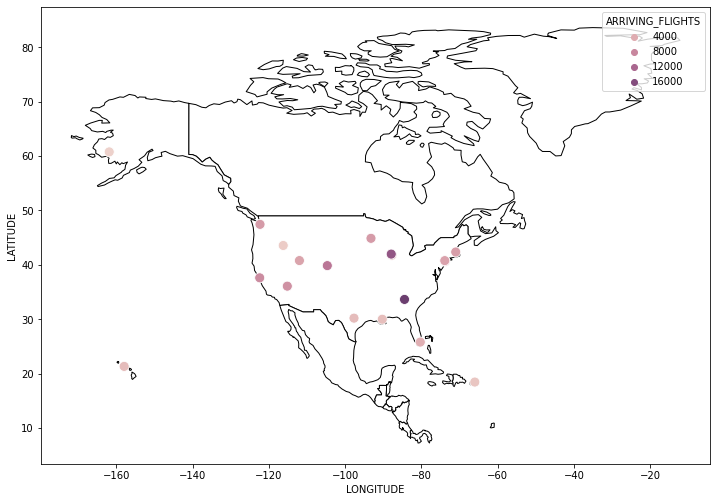

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

f, ax = plt.subplots(1, figsize=(12, 12))

ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black', ax=ax)

sns.scatterplot(x = airports_usa["LONGITUDE"], y = airports_usa["LATITUDE"], hue = "ARRIVING_FLIGHTS", hue_norm=(0, 24000) ,data=airports_usa, s = 100)

plt.show()